In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 0. Pre-Processing Data and EDA

In [3]:
df.shape

(284807, 31)

In [4]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

492 transactions have been labeled as Class 1, i.e., fraudaulent transactions. The total number of transactions is 284807.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

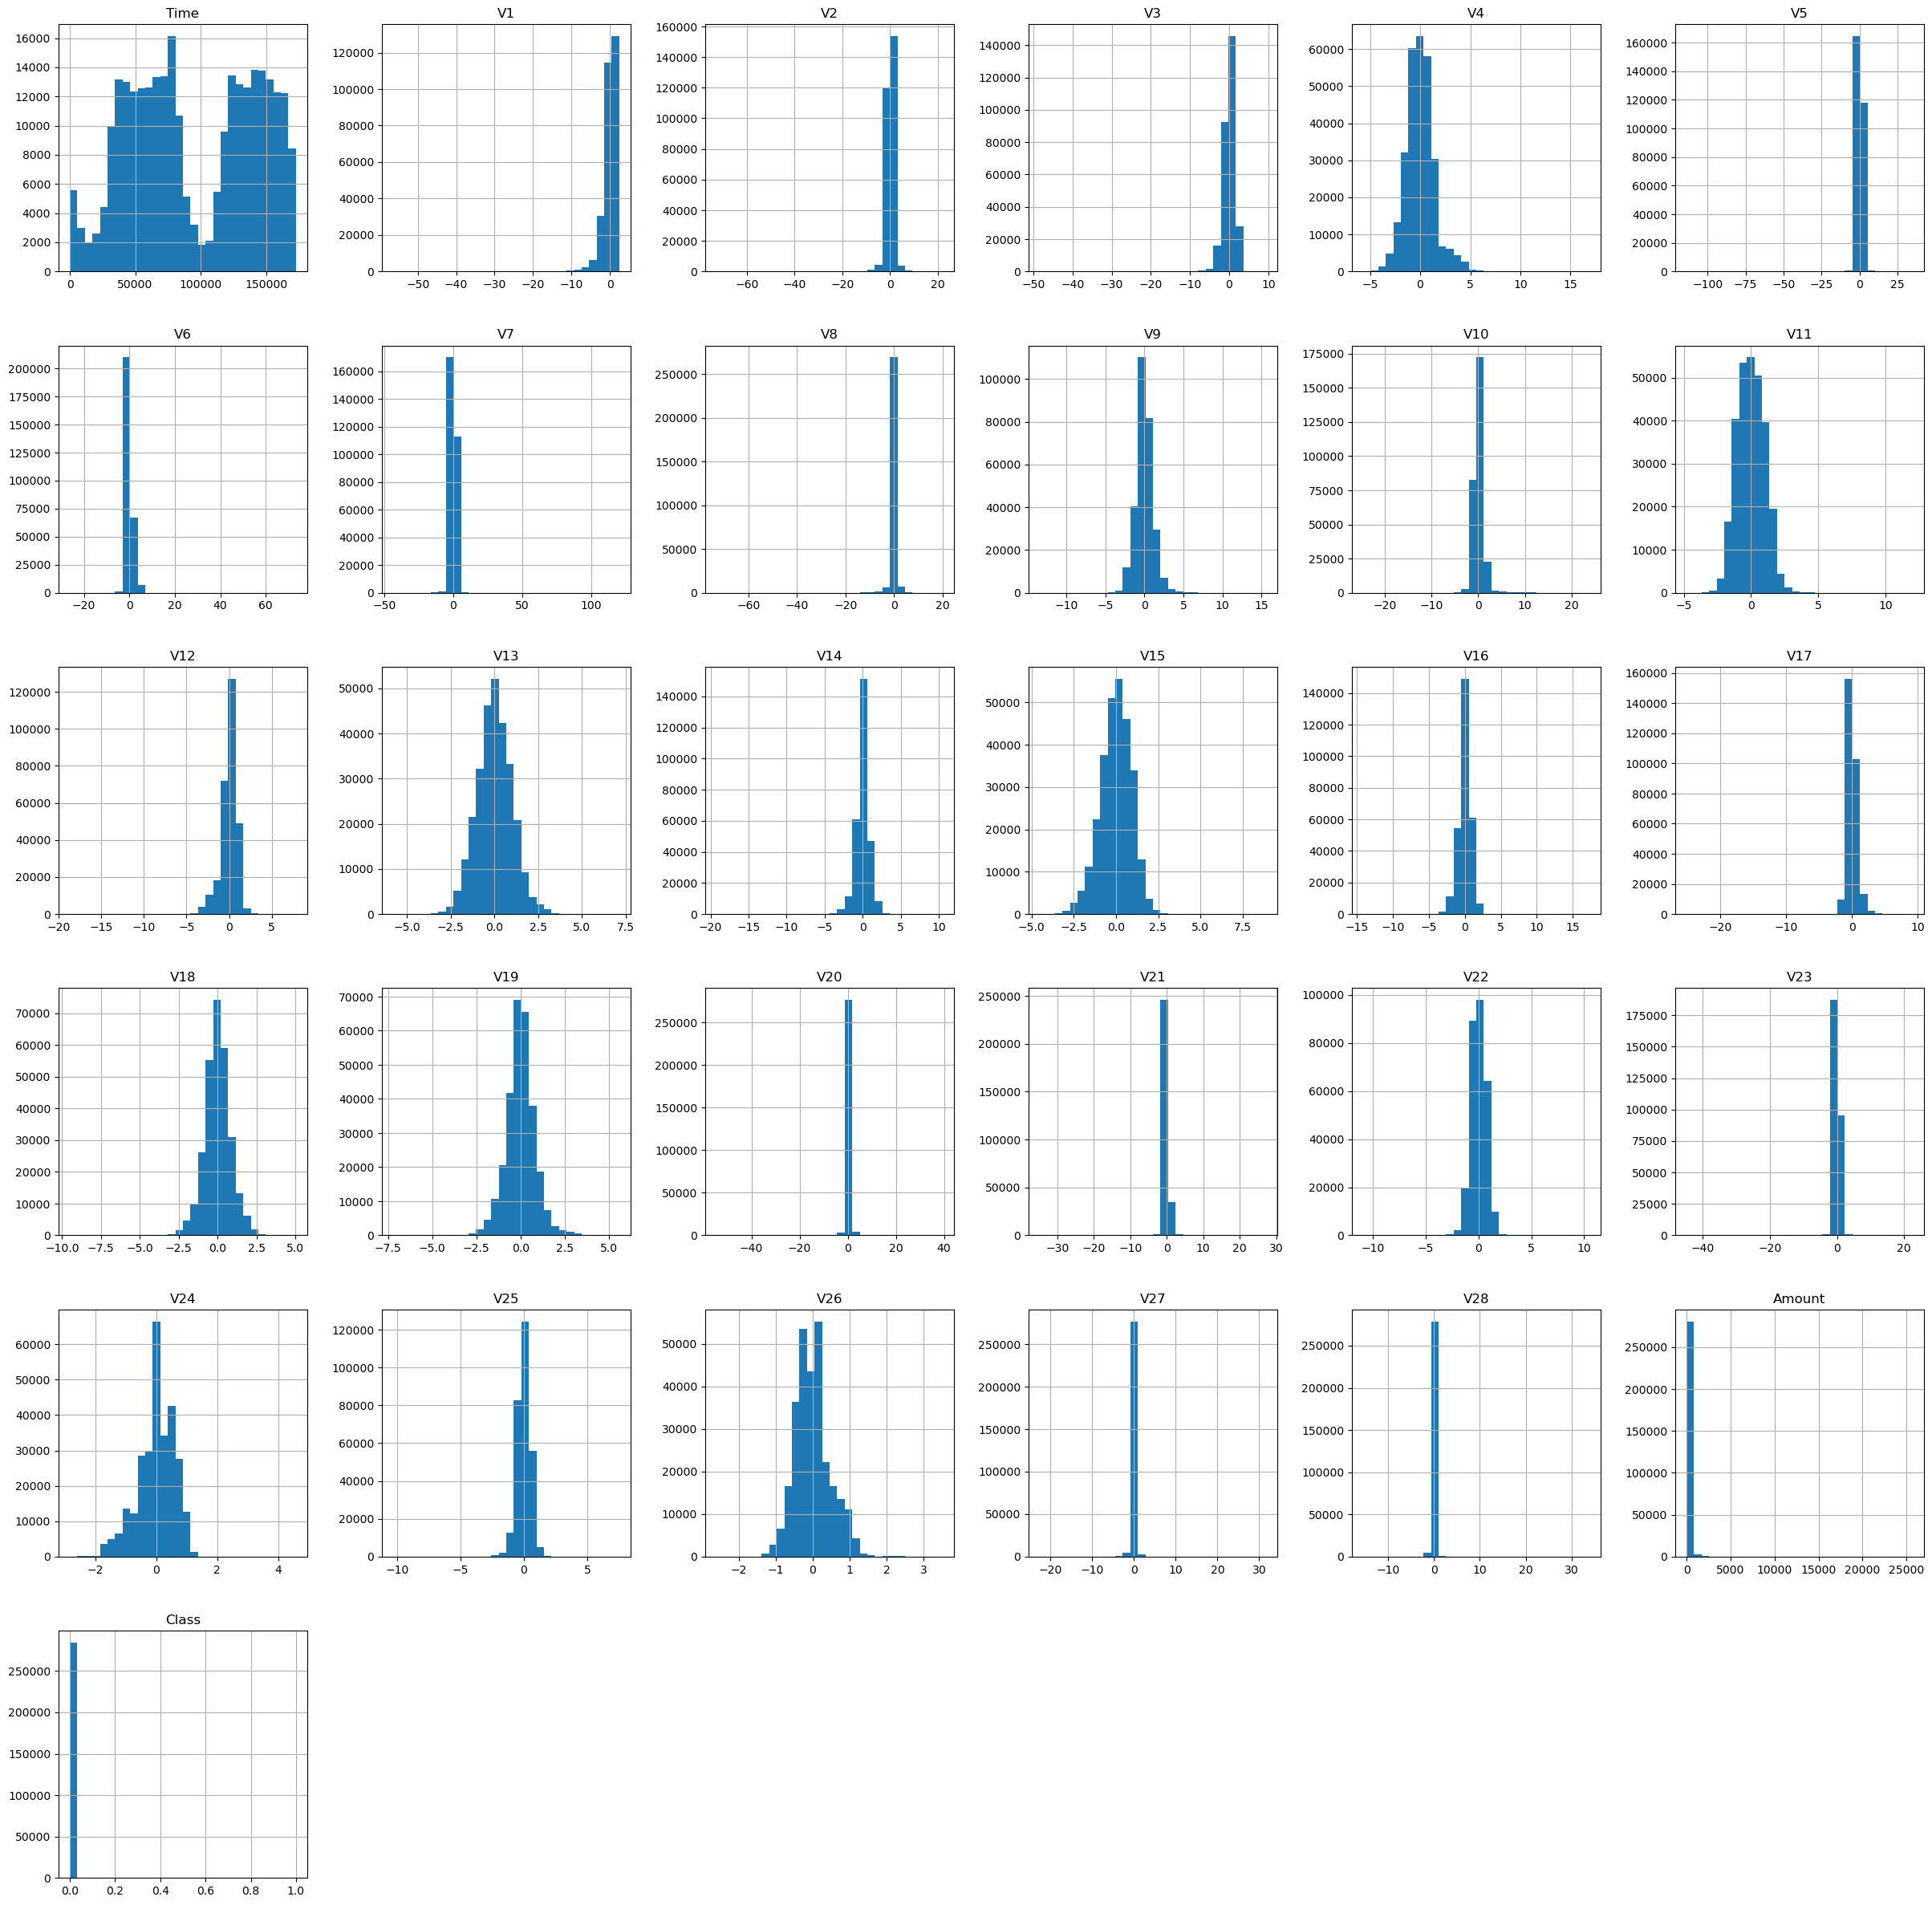

In [5]:
df.hist(bins = 30, figsize=(30,30))

### Descriptive Statistics

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

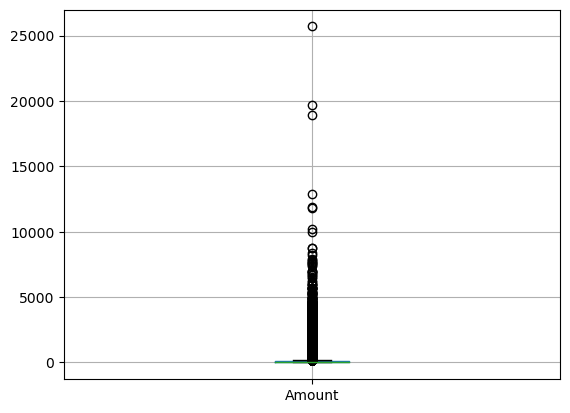

In [7]:
df.boxplot(column= ["Amount"])

- Transactions amount have wide spreads with min. of 0 and max. 25691.16
- Relative fraudaulent cases = 0.1727%

### Robust Scaling

In [8]:
from sklearn.preprocessing import RobustScaler

In [9]:
new_df = df.copy()
new_df["Amount"] = RobustScaler().fit_transform(new_df["Amount"].to_numpy().reshape(-1,1))

In [10]:
new_df["Amount"].describe

<bound method NDFrame.describe of 0         1.783274
1        -0.269825
2         4.983721
3         1.418291
4         0.670579
            ...   
284802   -0.296653
284803    0.038986
284804    0.641096
284805   -0.167680
284806    2.724796
Name: Amount, Length: 284807, dtype: float64>

<Axes: >

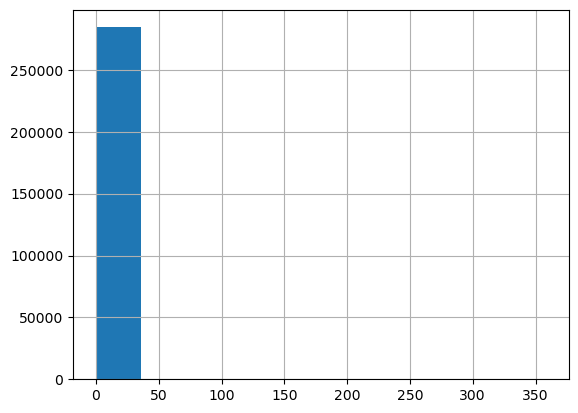

In [11]:
new_df["Amount"].hist()

In [12]:
time = new_df["Time"]
new_df["Time"] = (time - time.min()) / (time.max() - time.min())
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


# 1. Train / Test Split

In [13]:
from sklearn.model_selection import train_test_split

Splitting the data into train, test, and validation sets. First, I split the data set into a training set of 80%. Then, I split the remaining 20% into a dedicated test and validation set with each 10% of the original data set.

In [14]:
train_lib, pre_test_lib = train_test_split(new_df, test_size = 0.2, random_state=50)
print(train_lib.shape, pre_test_lib.shape)

(227845, 31) (56962, 31)


In [15]:
test_lib, val_lib = train_test_split(pre_test_lib, test_size = 0.5, random_state=50)
print(test_lib.shape, val_lib.shape)

(28481, 31) (28481, 31)


In [16]:
train_lib["Class"].value_counts(), test_lib["Class"].value_counts(), val_lib["Class"].value_counts()

(Class
 0    227441
 1       404
 Name: count, dtype: int64,
 Class
 0    28436
 1       45
 Name: count, dtype: int64,
 Class
 0    28438
 1       43
 Name: count, dtype: int64)

### Split into Features & Target

In [17]:
x_train, y_train = train_lib.iloc[:, :-1], train_lib.iloc[:, -1]
x_test, y_test = test_lib.iloc[:, :-1], test_lib.iloc[:, -1]
x_val, y_val = val_lib.iloc[:, :-1], val_lib.iloc[:, -1]

# 2. Model Training & Evaluation

In this section, we evaluate five machine learning models:
- **Logistic Regression:** A baseline statistical model for estimating probabilities, widely used for binary classification.
- **Shallow Neural Network:** A simpler architecture testing the hypothesis that less complexity can effectively capture data patterns.
- **Random Forest:** Constructs multiple decision trees for classification, known for high accuracy and flexibility.
- **Gradient Boosting Machine:** Uses sequential model building to correct errors, known for its predictive power.
- **Support Vector Machine:** Known for its effectiveness in high-dimensional spaces, ideal for binary classification tasks.

In [18]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [19]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg.score(x_train, y_train)

/Users/bennyschellinger/miniforge3/envs/new_env_name/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9993197129627598

In [20]:
from sklearn.metrics import classification_report

### Evaluation of Models Using Different Metrics
We are especially interested in the **F1-score** that combines **Precision** and **Recall** into a single metric by taking their harmonic mean.

- The **Precision** (also called called positive predictive value) can be translated to the question: *Out of all transactions labeled as fraudulent, how many actually were fraudulent?*
- The **Recall** (also known as sensitivity or true positive rate, tpr) can answer the question: *Out of all actual fraudulent transactions, how many did the model correctly identify as fraudulent?*

### Interpretation of Metrics
- High **Precision** means that when the model predicts a transaction is fraudulent, it is very likely to be correct. This reduces the inconvenience to customers from false alarms.
- High **Recall** means the model is effective at catching fraudulent transactions, which is crucial for preventing financial loss and protecting customers.
- The **F1-score** is particularly valuable in fraud detection because it ensures that both precision and recall are considered together. Focusing solely on improving one metric (e.g., recall) could detrimentally affect the other (e.g., precision), leading to either too many false positives (i.e., legitimate transactions flagged as fraud) or too many false negatives (i.e., fraudulent transactions not detected).

### Bottom Line
The **F1-score** helps balance these concerns, aiming for a model that is both accurate and reliable.

In [21]:
print(classification_report(y_val, logreg.predict(x_val), target_names=["Not Fraud", "Fraud"])) # 0 Classes are converted to "Not Fraud", while 1 Classes are converted to "Fraud"

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.79      0.51      0.62        43

    accuracy                           1.00     28481
   macro avg       0.89      0.76      0.81     28481
weighted avg       1.00      1.00      1.00     28481



The high accuracy leads us to believe that the model is predicting closely the target variable. However, since this data set is highly imbalanced, it only does good on the "Not Fraud" data, missing good predcition on the actual fraudaulent transactions.

### Shallow Neural Network

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [25]:
shallow_nn =  Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, "relu"))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, "sigmoid")) # output probabilitly

In [26]:
checkpoint = ModelCheckpoint("shallow_nn", save_best_only=True)

### Definition of Loss Function, Optimizer, and Metrics 

- The ```adam``` optimizer adjusts the model weights to minimize errors in a smart, adaptive manner.
- The ```binary_crossentropy``` loss function is specifically chosen for binary classification tasks, guiding the model to improve its predictions by minimizing the difference between the predicted probabilities and the actual binary labels.
- Finally, the model's effectiveness is gauged by its ```accuracy```, providing a straightforward metric to understand how often the model makes correct predictions.

In [27]:
shallow_nn.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [28]:
shallow_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 62        
                                                                 
 batch_normalization (Batch  (None, 2)                 8         
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 69 (276.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [29]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint, batch_size=32)

Epoch 1/5


2024-04-10 16:18:53.590299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7121/7121 [==============================] - ETA: 0s - loss: 0.0526 - accuracy: 0.9874

2024-04-10 16:19:40.501429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: shallow_nn/assets


INFO:tensorflow:Assets written to: shallow_nn/assets


7121/7121 [==============================] - 50s 7ms/step - loss: 0.0526 - accuracy: 0.9874 - val_loss: 0.0092 - val_accuracy: 0.9991
Epoch 2/5
7121/7121 [==============================] - 46s 6ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0098 - val_accuracy: 0.9989
Epoch 3/5
7120/7121 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9993INFO:tensorflow:Assets written to: shallow_nn/assets


INFO:tensorflow:Assets written to: shallow_nn/assets


7121/7121 [==============================] - 46s 7ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0087 - val_accuracy: 0.9990
Epoch 4/5
7118/7121 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9992INFO:tensorflow:Assets written to: shallow_nn/assets


INFO:tensorflow:Assets written to: shallow_nn/assets


7121/7121 [==============================] - 47s 7ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0075 - val_accuracy: 0.9989
Epoch 5/5
7121/7121 [==============================] - 46s 7ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0080 - val_accuracy: 0.9988


In [85]:
def neural_net_predictions(model, x, y):
    nn_pred = (model.predict(x).flatten() > 0.5).astype(int)
    clas_rep = classification_report(y, nn_pred, target_names=["Not Fraud", "Fraud"])
    print(clas_rep)

In [46]:
neural_net_predictions(shallow_nn, x_val, y_val)

891/891 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.61      0.65      0.63        43

    accuracy                           1.00     28481
   macro avg       0.80      0.83      0.81     28481
weighted avg       1.00      1.00      1.00     28481



### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=-1)

In [50]:
print(classification_report(y_val, rf.predict(x_val), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.74      0.47      0.57        43

    accuracy                           1.00     28481
   macro avg       0.87      0.73      0.79     28481
weighted avg       1.00      1.00      1.00     28481



### Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50,
                           random_state=0)

In [53]:
print(classification_report(y_val, gbc.predict(x_val), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.66      0.63      0.64        43

    accuracy                           1.00     28481
   macro avg       0.83      0.81      0.82     28481
weighted avg       1.00      1.00      1.00     28481



### Support Vector Machine

In [55]:
from sklearn.svm import LinearSVC

In [56]:
svc = LinearSVC(class_weight="balanced")
svc.fit(x_train, y_train)

/Users/bennyschellinger/miniforge3/envs/new_env_name/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/bennyschellinger/miniforge3/envs/new_env_name/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced')

In [57]:
print(classification_report(y_val, svc.predict(x_val), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.66      0.72      0.69        43

    accuracy                           1.00     28481
   macro avg       0.83      0.86      0.84     28481
weighted avg       1.00      1.00      1.00     28481



### Model Classification Overview

| Model          | Class     | Precision | Recall | F1-Score | Accuracy | Support |
|----------------|-----------|-----------|--------|----------|----------|---------|
| Support Vector | Fraud     | 0.66      | 0.72   | 0.69     | 1.00     | 43      |
|                | Not Fraud | 1.00      | 1.00   | 1.00     | 1.00     | 28438   |
| Gradient Boost | Fraud     | 0.66      | 0.63   | 0.64     | 1.00     | 43      |
|                | Not Fraud | 1.00      | 1.00   | 1.00     | 1.00     | 28438   |
| Shallow NN     | Fraud     | 0.61      | 0.65   | 0.63     | 1.00     | 43      |
|                | Not Fraud | 1.00      | 1.00   | 1.00     | 1.00     | 28438   |
| Logistic Reg.  | Fraud     | 0.79      | 0.51   | 0.62     | 1.00     | 43      |
|                | Not Fraud | 1.00      | 1.00   | 1.00     | 1.00     | 28438   |
| Random Forest  | Fraud     | 0.74      | 0.47   | 0.57     | 1.00     | 43      |
|                | Not Fraud | 1.00      | 1.00   | 1.00     | 1.00     | 28438   |


# 3. Undersampling

The data set is highly imbalanced with fraudulent transactions being significantly rarer than legitimate ones. This imbalance can lead to biased models that favor the majority class and overlook the minority class (fraudulent transactions).

By implementing undersampling, we reduce the size of the majority class, balancing the dataset and enhancing the model's ability to detect fraud more accurately and efficiently.

In [62]:
not_frauds = new_df.query("Class == 0")
frauds = new_df.query("Class == 1")
not_frauds["Class"].value_counts(), frauds["Class"].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

### Train / Test Split (Undersampled Data)

In [64]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df["Class"].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [65]:
train_bal, pre_test_bal = train_test_split(balanced_df, test_size = 0.2, random_state=50)
print(train_bal.shape, pre_test_bal.shape)

(787, 31) (197, 31)


In [66]:
test_bal, val_bal = train_test_split(pre_test_bal, test_size = 0.5, random_state=50)
print(test_bal.shape, val_bal.shape)

(98, 31) (99, 31)


In [67]:
train_bal["Class"].value_counts(), test_bal["Class"].value_counts(), val_bal["Class"].value_counts()

(Class
 1    403
 0    384
 Name: count, dtype: int64,
 Class
 0    54
 1    44
 Name: count, dtype: int64,
 Class
 0    54
 1    45
 Name: count, dtype: int64)

In [68]:
x_train_bal, y_train_bal = train_bal.iloc[:, :-1], train_bal.iloc[:, -1]
x_test_bal, y_test_bal = test_bal.iloc[:, :-1], test_bal.iloc[:, -1]
x_val_bal, y_val_bal = val_bal.iloc[:, :-1], val_bal.iloc[:, -1]

### Model Fitting & Evaluation (Undersampled Data)

#### Logistic Regression Model

In [74]:
logreg_bal = LogisticRegression()
logreg_bal.fit(x_train_bal, y_train_bal)
# optional: logreg_bal.score(x_train_bal, y_train_bal)

0.9529860228716646

In [75]:
print(classification_report(y_val_bal, logreg_bal.predict(x_val_bal), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.95      0.96      0.95        54
       Fraud       0.95      0.93      0.94        45

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



#### Shallow Neural Network (1)

In [76]:
shallow_nn_bal =  Sequential()
shallow_nn_bal.add(InputLayer((x_train_bal.shape[1],)))
shallow_nn_bal.add(Dense(2, "relu"))
shallow_nn_bal.add(BatchNormalization())
shallow_nn_bal.add(Dense(1, "sigmoid")) # output probabilitly

In [77]:
checkpoint_bal = ModelCheckpoint("shallow_nn_bal", save_best_only=True)

In [78]:
shallow_nn_bal.compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [79]:
shallow_nn_bal.fit(x_train_bal, y_train_bal, validation_data=(x_val_bal, y_val_bal), epochs=40, callbacks=checkpoint_bal, batch_size=32)

Epoch 1/40
 1/25 [>.............................] - ETA: 7s - loss: 1.1317 - accuracy: 0.2500

2024-04-11 13:37:17.800254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 0.7913 - accuracy: 0.5337

2024-04-11 13:37:18.405570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 1s 34ms/step - loss: 0.7913 - accuracy: 0.5337 - val_loss: 0.7741 - val_accuracy: 0.5758
Epoch 2/40
25/25 [==============================] - ETA: 0s - loss: 0.7003 - accuracy: 0.6201INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.7003 - accuracy: 0.6201 - val_loss: 0.6300 - val_accuracy: 0.6364
Epoch 3/40
25/25 [==============================] - ETA: 0s - loss: 0.6373 - accuracy: 0.6760INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.6373 - accuracy: 0.6760 - val_loss: 0.5672 - val_accuracy: 0.6768
Epoch 4/40
25/25 [==============================] - ETA: 0s - loss: 0.5834 - accuracy: 0.7459INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.5834 - accuracy: 0.7459 - val_loss: 0.5339 - val_accuracy: 0.7374
Epoch 5/40
25/25 [==============================] - ETA: 0s - loss: 0.5632 - accuracy: 0.7471INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.5632 - accuracy: 0.7471 - val_loss: 0.5105 - val_accuracy: 0.7475
Epoch 6/40
25/25 [==============================] - ETA: 0s - loss: 0.5363 - accuracy: 0.7827INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.5363 - accuracy: 0.7827 - val_loss: 0.4927 - val_accuracy: 0.7677
Epoch 7/40
25/25 [==============================] - ETA: 0s - loss: 0.5097 - accuracy: 0.8145INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.5097 - accuracy: 0.8145 - val_loss: 0.4751 - val_accuracy: 0.8283
Epoch 8/40
25/25 [==============================] - ETA: 0s - loss: 0.4966 - accuracy: 0.8196INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.4966 - accuracy: 0.8196 - val_loss: 0.4618 - val_accuracy: 0.8384
Epoch 9/40
21/25 [========================>.....] - ETA: 0s - loss: 0.4792 - accuracy: 0.8333INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 17ms/step - loss: 0.4794 - accuracy: 0.8323 - val_loss: 0.4484 - val_accuracy: 0.8687
Epoch 10/40
24/25 [===========================>..] - ETA: 0s - loss: 0.4627 - accuracy: 0.8451INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.4619 - accuracy: 0.8463 - val_loss: 0.4354 - val_accuracy: 0.8687
Epoch 11/40
23/25 [==========================>...] - ETA: 0s - loss: 0.4491 - accuracy: 0.8601INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.4484 - accuracy: 0.8590 - val_loss: 0.4221 - val_accuracy: 0.8687
Epoch 12/40
25/25 [==============================] - ETA: 0s - loss: 0.4329 - accuracy: 0.8755INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.4329 - accuracy: 0.8755 - val_loss: 0.4105 - val_accuracy: 0.8687
Epoch 13/40
25/25 [==============================] - ETA: 0s - loss: 0.4192 - accuracy: 0.8717INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.4192 - accuracy: 0.8717 - val_loss: 0.4002 - val_accuracy: 0.8687
Epoch 14/40
24/25 [===========================>..] - ETA: 0s - loss: 0.4048 - accuracy: 0.8737INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.4047 - accuracy: 0.8742 - val_loss: 0.3920 - val_accuracy: 0.8687
Epoch 15/40
25/25 [==============================] - ETA: 0s - loss: 0.3871 - accuracy: 0.8856INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.3871 - accuracy: 0.8856 - val_loss: 0.3801 - val_accuracy: 0.8687
Epoch 16/40
17/25 [===================>..........] - ETA: 0s - loss: 0.3861 - accuracy: 0.8860INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.3808 - accuracy: 0.8882 - val_loss: 0.3716 - val_accuracy: 0.8687
Epoch 17/40
21/25 [========================>.....] - ETA: 0s - loss: 0.3656 - accuracy: 0.8824INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 18ms/step - loss: 0.3662 - accuracy: 0.8818 - val_loss: 0.3627 - val_accuracy: 0.8687
Epoch 18/40
25/25 [==============================] - ETA: 0s - loss: 0.3583 - accuracy: 0.8895INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.3583 - accuracy: 0.8895 - val_loss: 0.3553 - val_accuracy: 0.8687
Epoch 19/40
24/25 [===========================>..] - ETA: 0s - loss: 0.3507 - accuracy: 0.8984INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.3503 - accuracy: 0.8971 - val_loss: 0.3476 - val_accuracy: 0.8788
Epoch 20/40
24/25 [===========================>..] - ETA: 0s - loss: 0.3346 - accuracy: 0.9023INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 17ms/step - loss: 0.3330 - accuracy: 0.9034 - val_loss: 0.3394 - val_accuracy: 0.8788
Epoch 21/40
25/25 [==============================] - ETA: 0s - loss: 0.3253 - accuracy: 0.9085INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.3253 - accuracy: 0.9085 - val_loss: 0.3325 - val_accuracy: 0.8788
Epoch 22/40
25/25 [==============================] - ETA: 0s - loss: 0.3230 - accuracy: 0.9022INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.3230 - accuracy: 0.9022 - val_loss: 0.3250 - val_accuracy: 0.8788
Epoch 23/40
25/25 [==============================] - ETA: 0s - loss: 0.3079 - accuracy: 0.9123INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.3079 - accuracy: 0.9123 - val_loss: 0.3188 - val_accuracy: 0.8788
Epoch 24/40
24/25 [===========================>..] - ETA: 0s - loss: 0.3035 - accuracy: 0.9089INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.3023 - accuracy: 0.9098 - val_loss: 0.3140 - val_accuracy: 0.8788
Epoch 25/40
25/25 [==============================] - ETA: 0s - loss: 0.2960 - accuracy: 0.9085INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.2960 - accuracy: 0.9085 - val_loss: 0.3094 - val_accuracy: 0.8788
Epoch 26/40
25/25 [==============================] - ETA: 0s - loss: 0.2980 - accuracy: 0.9098INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.2980 - accuracy: 0.9098 - val_loss: 0.3063 - val_accuracy: 0.8788
Epoch 27/40
25/25 [==============================] - ETA: 0s - loss: 0.2897 - accuracy: 0.9123INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.2897 - accuracy: 0.9123 - val_loss: 0.3013 - val_accuracy: 0.8788
Epoch 28/40
23/25 [==========================>...] - ETA: 0s - loss: 0.2868 - accuracy: 0.9130INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.2844 - accuracy: 0.9161 - val_loss: 0.2976 - val_accuracy: 0.8788
Epoch 29/40
18/25 [====================>.........] - ETA: 0s - loss: 0.2860 - accuracy: 0.9062INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.2807 - accuracy: 0.9098 - val_loss: 0.2903 - val_accuracy: 0.8788
Epoch 30/40
18/25 [====================>.........] - ETA: 0s - loss: 0.2692 - accuracy: 0.9184INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.2697 - accuracy: 0.9174 - val_loss: 0.2854 - val_accuracy: 0.8788
Epoch 31/40
25/25 [==============================] - ETA: 0s - loss: 0.2671 - accuracy: 0.9161INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.2671 - accuracy: 0.9161 - val_loss: 0.2838 - val_accuracy: 0.8788
Epoch 32/40
18/25 [====================>.........] - ETA: 0s - loss: 0.2638 - accuracy: 0.9149INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 17ms/step - loss: 0.2668 - accuracy: 0.9123 - val_loss: 0.2793 - val_accuracy: 0.8788
Epoch 33/40
25/25 [==============================] - ETA: 0s - loss: 0.2658 - accuracy: 0.9187INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 15ms/step - loss: 0.2658 - accuracy: 0.9187 - val_loss: 0.2756 - val_accuracy: 0.8889
Epoch 34/40
25/25 [==============================] - ETA: 0s - loss: 0.2590 - accuracy: 0.9174INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 20ms/step - loss: 0.2590 - accuracy: 0.9174 - val_loss: 0.2726 - val_accuracy: 0.8889
Epoch 35/40
25/25 [==============================] - ETA: 0s - loss: 0.2545 - accuracy: 0.9136INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.2545 - accuracy: 0.9136 - val_loss: 0.2700 - val_accuracy: 0.8889
Epoch 36/40
25/25 [==============================] - ETA: 0s - loss: 0.2461 - accuracy: 0.9263INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 17ms/step - loss: 0.2461 - accuracy: 0.9263 - val_loss: 0.2650 - val_accuracy: 0.8889
Epoch 37/40
25/25 [==============================] - ETA: 0s - loss: 0.2457 - accuracy: 0.9161INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.2457 - accuracy: 0.9161 - val_loss: 0.2626 - val_accuracy: 0.8889
Epoch 38/40
23/25 [==========================>...] - ETA: 0s - loss: 0.2466 - accuracy: 0.9266INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 16ms/step - loss: 0.2480 - accuracy: 0.9250 - val_loss: 0.2596 - val_accuracy: 0.8889
Epoch 39/40
25/25 [==============================] - ETA: 0s - loss: 0.2497 - accuracy: 0.9161INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 1s 28ms/step - loss: 0.2497 - accuracy: 0.9161 - val_loss: 0.2596 - val_accuracy: 0.8889
Epoch 40/40
23/25 [==========================>...] - ETA: 0s - loss: 0.2577 - accuracy: 0.9130INFO:tensorflow:Assets written to: shallow_nn_bal/assets


INFO:tensorflow:Assets written to: shallow_nn_bal/assets


25/25 [==============================] - 0s 18ms/step - loss: 0.2487 - accuracy: 0.9187 - val_loss: 0.2566 - val_accuracy: 0.8889


In [86]:
# use function for predicting & reporting classification of shallow neural networks
neural_net_predictions(shallow_nn_bal, x_val_bal, y_val_bal)

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

   Not Fraud       0.83      1.00      0.91        54
       Fraud       1.00      0.76      0.86        45

    accuracy                           0.89        99
   macro avg       0.92      0.88      0.88        99
weighted avg       0.91      0.89      0.89        99



#### Shallow Neural Network (2)

In [87]:
shallow_nn_bal_2 =  Sequential()
shallow_nn_bal_2 .add(InputLayer((x_train_bal.shape[1],)))
shallow_nn_bal_2 .add(Dense(1, "relu"))
shallow_nn_bal_2 .add(BatchNormalization())
shallow_nn_bal_2 .add(Dense(1, "sigmoid")) # output probabilitly

In [88]:
checkpoint_bal_2 = ModelCheckpoint("shallow_nn_bal_2 ", save_best_only=True)

In [89]:
shallow_nn_bal_2 .compile(optimizer="adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [90]:
shallow_nn_bal_2 .fit(x_train_bal, y_train_bal, validation_data=(x_val_bal, y_val_bal), epochs=40, callbacks=checkpoint_bal, batch_size=32)

Epoch 1/40


2024-04-11 13:50:24.470498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 2s 25ms/step - loss: 0.7733 - accuracy: 0.4307 - val_loss: 0.6728 - val_accuracy: 0.5657
Epoch 2/40
 9/25 [=========>....................] - ETA: 0s - loss: 0.7192 - accuracy: 0.5035

2024-04-11 13:50:25.889237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.5464 - val_loss: 0.6012 - val_accuracy: 0.6566
Epoch 3/40
25/25 [==============================] - 0s 9ms/step - loss: 0.6373 - accuracy: 0.6493 - val_loss: 0.5706 - val_accuracy: 0.6869
Epoch 4/40
25/25 [==============================] - 0s 8ms/step - loss: 0.6192 - accuracy: 0.6773 - val_loss: 0.5526 - val_accuracy: 0.7071
Epoch 5/40
25/25 [==============================] - 0s 8ms/step - loss: 0.5921 - accuracy: 0.7408 - val_loss: 0.5403 - val_accuracy: 0.7273
Epoch 6/40
25/25 [==============================] - 0s 10ms/step - loss: 0.5803 - accuracy: 0.7548 - val_loss: 0.5292 - val_accuracy: 0.7576
Epoch 7/40
25/25 [==============================] - 0s 8ms/step - loss: 0.5695 - accuracy: 0.7675 - val_loss: 0.5192 - val_accuracy: 0.7879
Epoch 8/40
25/25 [==============================] - 0s 8ms/step - loss: 0.5567 - accuracy: 0.7764 - val_loss: 0.5092 - val_accuracy: 0.8384
Epoch 9/40
25/25 [============

In [91]:
# use function for predicting & reporting classification of shallow neural networks
neural_net_predictions(shallow_nn_bal_2 , x_val_bal, y_val_bal)

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

   Not Fraud       0.84      0.96      0.90        54
       Fraud       0.95      0.78      0.85        45

    accuracy                           0.88        99
   macro avg       0.89      0.87      0.88        99
weighted avg       0.89      0.88      0.88        99



2024-04-11 13:50:39.293906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


#### Random Forest Classifier

In [92]:
rf_bal = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_bal.fit(x_train_bal, y_train_bal)

RandomForestClassifier(max_depth=2, n_jobs=-1)

In [93]:
print(classification_report(y_val_bal, rf_bal.predict(x_val_bal), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.85      0.98      0.91        54
       Fraud       0.97      0.80      0.88        45

    accuracy                           0.90        99
   macro avg       0.91      0.89      0.90        99
weighted avg       0.91      0.90      0.90        99



#### Gradient Boosting Model

In [94]:
gbc_bal = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
gbc_bal.fit(x_train_bal, y_train_bal)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=0)

In [95]:
print(classification_report(y_val_bal, gbc_bal.predict(x_val_bal), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.88      0.93      0.90        54
       Fraud       0.90      0.84      0.87        45

    accuracy                           0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99



#### Support Vector Model

In [96]:
svc_bal = LinearSVC(class_weight="balanced")
svc_bal.fit(x_train_bal, y_train_bal)

/Users/bennyschellinger/miniforge3/envs/new_env_name/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/bennyschellinger/miniforge3/envs/new_env_name/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced')

In [97]:
print(classification_report(y_val_bal, svc_bal.predict(x_val_bal), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.93      0.96      0.95        54
       Fraud       0.95      0.91      0.93        45

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99



### Model Classification Overview (Undersampled Data)

| Balanced Model                         | Class     | Precision | Recall | F1-Score | Accuracy | Support |
|-------------------------------|-----------|-----------|--------|----------|----------|---------|
| Logistic Regression (LogReg)  | Not Fraud | 0.95      | 0.96   | 0.95     | 0.95     | 54      |
|                               | Fraud     | 0.95      | 0.93   | 0.94     | 0.95     | 45      |
| Shallow Neural Network (1)    | Not Fraud | 0.83      | 1.00   | 0.91     | 0.89     | 54      |
|                               | Fraud     | 1.00      | 0.76   | 0.86     | 0.89     | 45      |
| Shallow Neural Network (2)    | Not Fraud | 0.84      | 0.96   | 0.90     | 0.88     | 54      |
|                               | Fraud     | 0.95      | 0.78   | 0.85     | 0.88     | 45      |
| Random Forest Classifier      | Not Fraud | 0.85      | 0.98   | 0.91     | 0.90     | 54      |
|                               | Fraud     | 0.97      | 0.80   | 0.88     | 0.90     | 45      |
| Gradient Boosting Classifier  | Not Fraud | 0.88      | 0.93   | 0.90     | 0.89     | 54      |
|                               | Fraud     | 0.90      | 0.84   | 0.87     | 0.89     | 45      |
| Support Vector Machine (SVM)  | Not Fraud | 0.93      | 0.96   | 0.95     | 0.94     | 54      |
|                               | Fraud     | 0.95      | 0.91   | 0.93     | 0.94     | 45      |


# 4. Testing Best Model on Unseen Data

In our quest to find the optimal model for credit card fraud detection, we focus on the F1-score for "Fraud" due to its holistic view combining precision and recall. Through our analysis:

- **Balanced dataset** is prioritized for evaluation due to its fair class representation.
- Among all models, **Logistic Regression (LogReg)** stands out with the highest F1-score of **0.94** for detecting fraud.

In [98]:
# predict on unseen holdout data (y_test_bal, x_test_bal)
print(classification_report(y_test_bal, logreg_bal.predict(x_test_bal), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.96      0.98        54
       Fraud       0.96      1.00      0.98        44

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



### Plot Credit Card Detection Model Effectiveness

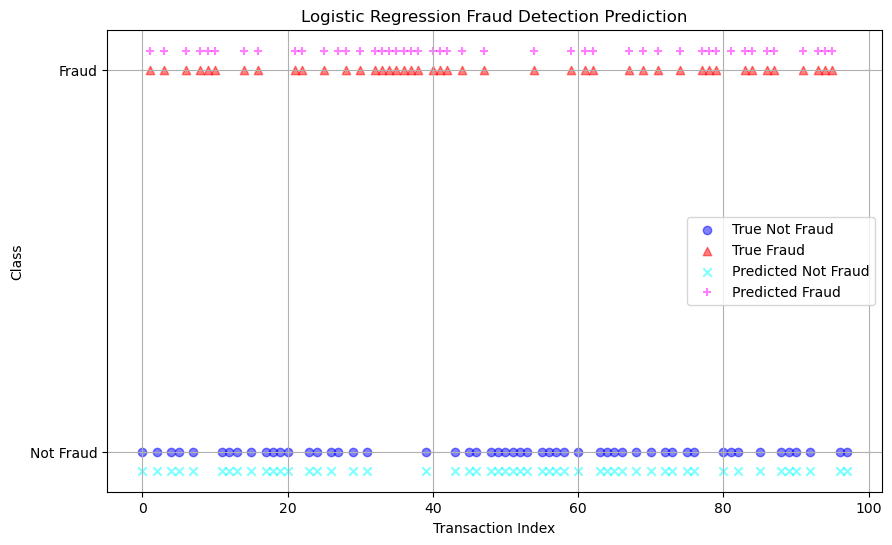

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test_bal contains your true labels and predictions contains the predicted labels
true_labels = y_test_bal  # Your true labels
predictions = logreg_bal.predict(x_test_bal)  # Your model's predictions

# Generate indices for your labels for plotting purposes
indices = np.arange(len(true_labels))

# Plotting the true labels
plt.figure(figsize=(10, 6))
plt.scatter(indices[true_labels == 0], true_labels[true_labels == 0], alpha=0.5, marker='o', color='blue', label='True Not Fraud')
plt.scatter(indices[true_labels == 1], true_labels[true_labels == 1], alpha=0.5, marker='^', color='red', label='True Fraud')

# Plotting the predicted labels slightly offset for visibility
plt.scatter(indices[predictions == 0], predictions[predictions == 0] - 0.05, alpha=0.5, marker='x', color='cyan', label='Predicted Not Fraud')
plt.scatter(indices[predictions == 1], predictions[predictions == 1] + 0.05, alpha=0.5, marker='+', color='magenta', label='Predicted Fraud')

plt.title('Logistic Regression Fraud Detection Prediction')
plt.xlabel('Transaction Index')
plt.ylabel('Class')
plt.yticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend()
plt.grid(True)
plt.savefig("assets/model_effectiveness.png")
plt.show()

This code evaluates our Logistic Regression model on unseen holdout data (`x_test_bal`), measuring its performance against actual labels (`y_test_bal`). It utilizes `classification_report` to present precision, recall, and F1-scores for both "Not Fraud" and "Fraud" classes, offering a comprehensive performance breakdown.

- **Not Fraud:**
  - **Precision:** At 1.00, the model perfectly identifies legitimate transactions, ensuring no false positives.
  - **Recall:** At 0.96, it successfully flags 96% of legitimate transactions, with a minimal chance of misclassifying fraud as legitimate.
  - **F1-Score:** At 0.98, there's an excellent balance between precision and recall, indicating reliable identification of legitimate transactions.

- **Fraud:**
  - **Precision:** At 0.96, nearly all transactions flagged as fraud are indeed fraudulent, minimizing the inconvenience to customers.
  - **Recall:** At 1.00, it captures 100% of fraudulent transactions, showcasing the model's effectiveness in fraud detection.
  - **F1-Score:** At 0.98, the model demonstrates a perfect balance in accurately identifying fraud without misclassifying legitimate transactions.

- **Overall Accuracy:** At 0.98 for the combined dataset of 98 transactions, the model proves to be highly effective in distinguishing between fraudulent and legitimate transactions.

**Conclusion:** The model exhibits outstanding precision and recall for both classes, showcasing its capability to accurately detect fraud while minimizing false positives, thus proving its robustness and reliability for credit card fraud detection.
